In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Scalars, Vectors, Matrices, and Tensors in Python
These all represent different dimensionality of data in linear algebra:

<img style="max-height: 200px" src="https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg"></img>
 - Scalar: Single value
 - Vector: Array of values
 - Matrix: 2-D array of values
 - Tensor: N-D array of values (image only shows 3-Dimensional array)
 
We can represent these constructs directly in python's numpy package:

In [ ]:
scalar = np.array([5])

vector = np.array([1,2])

matrix = np.array([[1,2],
                  [2,4]])

tensor = np.array([[
        [1,2], [3,4]
    ],[
        [5,6], [7,8]
    ]
])

print(f'Example Object \t Type \t\t Shape')
print('---------------------------------------')
print(f'{scalar} \t\t Scalar \t {scalar.shape}\n') # 2^0
print('---------------------------------------')
print(f'{vector} \t\t Vector \t {vector.shape}\n') # 2^1
print('---------------------------------------')
print(f'{matrix} \t Matrix \t {matrix.shape}\n\n') # 2^2
print('---------------------------------------')
print(f'{tensor} \t 3D Tensor \t {tensor.shape}') # 2^8
print('---------------------------------------')

----

## Broadcasting
Broadcasting is how numpy coerces differently shaped matrices to be compatable for arthimetic operations (+, -, *, /).

It can enable us to take a matrix with fewer dimensions and map it across an axis of another array with more dimensions.

$$\begin{bmatrix}a & b\\c & d\\e & f\end{bmatrix} \cdot \begin{bmatrix}g & h\end{bmatrix}
= \begin{bmatrix}ag & bh\\cg & dh\\eg & fh\end{bmatrix}$$

*Note: This is not the same thing as dot products*

In [ ]:
m1 = np.array([[1, 2], [3, 4], [5, 6]]) # Array with two dimensions
m2 = np.array([2, 4]) # Array with one dimension

In [ ]:
print(f'Matrix 1 (m1):\n{m1}\n')

In [ ]:
print(f'Matrix 2 (m2):\n{m2}\n')

In [ ]:
print(f'm1 * m2:\n{m1 * m2}\n')

$$\begin{bmatrix}1 & 2\\3 & 4\\5 & 6\end{bmatrix} \cdot \begin{bmatrix}2 & 4\end{bmatrix}
= \begin{bmatrix}1*2 & 2*4\\3*2 & 4*4\\5*2 & 6*4\end{bmatrix}
= \begin{bmatrix}2 & 8\\6 & 16\\10 & 24\end{bmatrix}$$

----

## Dot Products and Matrix Mulitplication
Dot product is a linear algebra term to describe the relationship between two vectors.

$$u\cdot v=|u||v|cos(\theta)$$

In ML, the **Dot Product** is a common techinque for evaluting the joint result of inputs (**X**) and weights (**W**) to determine our outputs/predictions.

Given that **Dot Products** are only between two vectors, we instead typically use a specific implementation of **Matrix Multiplicationn** to parallelize the calucation across numerous records/inputs.

Given:
$$inputs = \begin{bmatrix}a & b\\c & d\\e & f\end{bmatrix}$$

$$weights = \begin{bmatrix}w_1 \\ w_2\end{bmatrix}$$

We get:
$$inputs\cdot weights = \begin{bmatrix}a*w_1 + b*w_2\\c*w_1 + d*w_2\\e*w_1 + f*w_2\end{bmatrix}$$
\
\
\
***NOTE: For matrix multiplication the inner dimensions need to  align:***
  - $MxN \cdot NxP => MxP$
    - Example: &nbsp; $(3, 2) \cdot (2, 1) => (3, 1)$
  - Commonly in DL: &nbsp; $inputs \cdot weights => Z$



### **In Class Question:**
What does this formula look like: $a*w_1 + b*w_2$

In [ ]:
m1 = np.array([[1, 2], [3, 4], [4, 5]])
m2 = np.array([1, 2]) # When defining a Mx1 matrix, numpy can be lax

print(
    f'''m1:\n{m1}
    \nm2:\n{m2}\n'''
)

In [ ]:
print(f'The provided matrices are of shape {m1.shape} and {m2.shape}')

This means that we can calculate the matrix multiplication of the matrices:

In [ ]:
try:
    print(np.dot(m1, m2))
    #print(m1 @ m2) # alternate syntax for matrix multiplication
except ValueError:
    print(f"Error: Muliplication won't work, shapes incompatiable: {m1.shape} * {m2.shape}\n")


Typically when working with Matrices we'll us the following notation to represent the dimensionality of the matrix **(M, N)**. In most ML applications **M** will represent the number of records/samples and **N** represents the number of features (size of our features space).

While not true for most deep learning applications, in linear models (where we'll be starting) **N** would also represent our model's weights, as we have a weight for each feature. Therefore, by taking the dot product $(M, N) \cdot (N, 1)$ we end up with a **(M, 1)** matrix, or simply **M** predictions.

***Hint:***\
Later in class we'll talk more about this when lookikng into the following formula $\boldsymbol{y = B_0 + X_1*B_1 ... X_N*B_N }$

----
## Aligning our Matrices

Frequently, when working at a lower level with our networks we may end up in situations where our matrices are not properly oriented correctly.

Example:
 - $Matrix_1 = (M, N)\; and\; Matrix_2 = (1, N)$

In these situations we simply need to transpose $Matrix_2$ to align our dimensions:

![image.png](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)

In [ ]:
# Transposing
m1 = np.array([[1, 2], [3, 4], [4,5]])
print(f'm1:\n{m1}\n')
print(f'transpose(m1):\n{m1.T}')


----
# Bias, Variance, and/or Capacity

Whenever we talk about a model's performance one of the main topics is the ***error term***. This is effectively a gauge of how performant the model is, and can be captured through a number of means (mean-squared error, cross-entropy loss, etc.)

Ultimately though, error is dervied from the following:
 - Bias
 - Variance
 - Inherent Uncertainty/Noise
 
$$error(X) = Noise(X) + Bias(X) + Variance(X)$$

<img style="max-height:250px" src="https://miro.medium.com/max/1506/1*oO0KYF7Z84nePqfsJ9E0WQ.png"/>


## Visualizing These Error Terms

In general the three types of error terms can be thought of the following concepts in the graphic:
 - **Noise** - Our **irreducible error**. Essentially the chaos in the world that we can never fully capture (can't control).
 - **Bias** - The **error of a measuring technique**. Essentially how we build/structure our model (we can mitigate this).
 - **Variance** - The **variation due to our training data**. Essentially how the patterns we learn are influenced by datapoints we train on.
 
While our noise or irreducible error is constant, there are simply things out of our control, bias and variance have a trade off. As we make our model more complex we are removing assumptions we have to make about the data, but at the same time we let our training data influence our decision making process more heavily.
 
Through a quickish example we can walk through some of these effects on an example problem:

----

### Setting up our problem
We can take a given function:
$$y = -\frac{1}{5} * X^3 + X^2 + 20$$
and add noise and measurement error:
$$y = -\frac{1}{5} * X^3 + X^2 + 20 - 10 + Z \in (Normal Distribution)$$
- *The -10 gives a constant offset representing an error in our measuring instrument*
- *The random Z would represent random noise within the environment.*



In [ ]:
from sklearn import preprocessing

sample_size = 100
np.random.seed(10)

# Create our dataset
X = np.random.uniform(-10, 10, size=(sample_size, 1))
X = np.sort(X, axis=0)
y_true = -1/5*np.power(X, 3) + np.power(X, 2) + 20
y = y_true - 10 + 10*np.random.randn(sample_size, 1)


# Plot our data
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(X, y_true)
ax2.plot(X, y)
plt.show()

### Creating Models
With out training data defined, we can build a number of different ML models to try to fit to the data.

 - model_p1 - A model with 1 degree of freedom, meaning it will produce a linear solution
 - model_p2 - A model with a high per sample influence
 - model_p3 - A model with more normal parameters

In [ ]:
from sklearn.model_selection import train_test_split 

# Lets standardize our features
# results in mean of 0 and variance of 1
scaler = preprocessing.StandardScaler()
stand_X = scaler.fit_transform(X)

In [ ]:
from sklearn.svm import SVR

# Linear SVR model
model_p1 = SVR(kernel='poly', degree=1)
model_p1.fit(stand_X, y.ravel())
predictions_1 = model_p1.predict(stand_X)

# Model using rbf-kernel, but high gamma (high per sample influence)
model_p2 = SVR(kernel='rbf', C=1e6, gamma=8)
model_p2.fit(stand_X, y.ravel())
predictions_2 = model_p2.predict(stand_X)

# Model using rbf-kernel
model_p3 = SVR(kernel='rbf', C=1e6, gamma=.1)
model_p3.fit(stand_X, y.ravel())
predictions_3 = model_p3.predict(stand_X)

### Bias vs Variance Errors in our model
By simply ploting these different types of models, we can see that each of them is impacted differently by the training data. From being under influenced (high bias) to too influenced by the data (high variance).

In [ ]:
# Plot our data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

ax1.plot(X, y)
ax2.plot(X, predictions_1)
ax3.plot(X, predictions_2)
ax4.plot(X, predictions_3)

plt.tight_layout()
plt.show()

### Inerpreting Our Results:
    
In the graph below, we've plotted the <span style="color:orange">actual data</span>, the <span style="color:grey">linearly predicted results</span>, and the <span style="color:red">kernel predicted results</span>.

The key take away here is as follows:
 - The <span style="color:orange">actual data</span>.
 - The <span style="color:blue">actual data with noise</span>.
 - The <span style="color:grey">linear model's predictions</span> have a huge bias error (underfitting/under capacity). As this model only understands linear relationships.
 - The <span style="color:limegreen">kernel, with high flexibility, model's predictions</span> have a variance error (overfitting/over-capacity). As each individual sample is given an exorbitant amount of influence.
 - The <span style="color:red">properly tuned kernel model's predictions</span> seem to most closely approximate the true underlying function.

In [ ]:
# Plot our data
# Variance in the model
fig = plt.figure(figsize=(15, 10))
axes = fig.add_subplot(111)

axes.plot(X, y, c='blue')
axes.plot(X, predictions_1, c='grey')
axes.plot(X, predictions_2, c='limegreen')
axes.plot(X, predictions_3, c='red')
axes.plot(X, y_true, c='orange')

plt.tight_layout()
plt.show()

### Variance in our model
We can also visualize the impact that variance can have on our results by repeating our experiments with a singular model. By taking multiple random samples of our training data, we can see how our model's predictions shift based on different initializations.

An interesting thing is, if we were to increase the number of iterations of the data, we could begin to visualize a closer approximation of the original function.

In [ ]:
sample_size = 100
iterations = 50

# Variance in the model
fig = plt.figure(figsize=(15, 10))
axes = fig.add_subplot(111)

model_var = SVR(kernel='rbf', C=1e6, gamma=.1)

# Lets rerun this with a range of 1000!
for _ in range(iterations):
    rand_sample = np.random.randint(stand_X.shape[0], size=(sample_size))
    rand_in = stand_X[rand_sample]
    rand_out = np.ravel(y[rand_sample])
    model_var.fit(rand_in, rand_out)
    predictions_var = model_var.predict(stand_X)
    axes.plot(stand_X, predictions_var)

# Plot our data
plt.show()

### K-Fold Cross Validation
Because models can be heavily influenced by their initalization state we generally want to assess the variability in results. K-Fold Cross Validation is an approach to more accurately gauge how the variance error term will impact results. It works by splitting our dataset into **K folds**, using K-1 partitions to train whilst keeping the last partition as a testing set. The concept being that the aggregate result will be a less biased estimate of the model's overall performance.

<div style="margin:auto;width:50%">

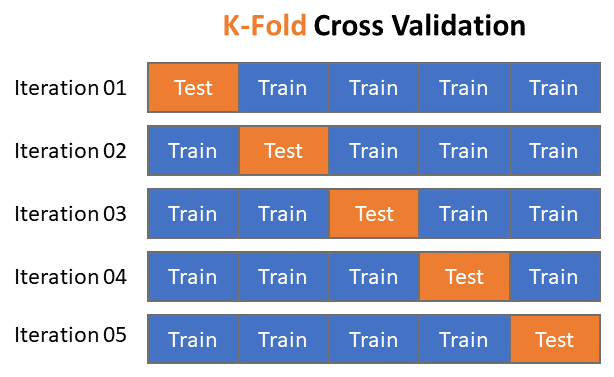

</div>

In [ ]:
from sklearn.model_selection import KFold

np.random.seed(10)
sample_size = 300

# Create our dataset
X = np.random.uniform(-10, 10, size=(sample_size, 1))
y_true = -1/5*np.power(X, 3) + np.power(X, 2) + 20
y = y_true - 10 + 10*np.random.randn(sample_size, 1)

scaler = preprocessing.StandardScaler()
stand_X = scaler.fit_transform(X)

kf = KFold(n_splits=3) # Create our splits

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
ax1.scatter(X, y, c='blue')
colors = ['orange', 'red', 'cyan']

ix = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = SVR(kernel='rbf', C=1e6, gamma=1)
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    ax1.scatter(X_test, predictions, c=colors[ix])
    ix += 1
    
    
# Plot our data
plt.show()

----
## Gradient Descent
Gradient descent is one of the primary algorithms for any ML algorithm and is at the core of Deep Learning. It is the process of finding a local (although ideally global) maximum or minimum for a set function.

To visualize how gradient descent works, we'll use a simple quadratic function: $y = x^2$

In [ ]:
x = []
y = []

for ix in range(-50, 50):
    x.append(ix)
    y.append(ix**2)
    
fig= plt.figure()
axes=fig.add_subplot(111)
axes.plot(x, y)
plt.show()

**Moving along the gradient**

 1. We'll start by placing a marker **x** at -20.
 2. Knowing our function is $y=X^2$ we can calculate the gradient from our current position.
 3. Using the calculated gradient, we can update our current position to follow the curve to a local minimum or maximum.
    - This works because our gradient tells us if we are currently positioned along an upward or downward slope  

In [ ]:
curr_x = -20

grad = lambda x: 2*x # The derivative, thus gradient, of x^2 is 2x

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(x, y)
ax1.set_title("Initial Position")
ax1.plot(curr_x, curr_x**2, 'r+')

curr_x -= grad(curr_x)
ax2.plot(x, y)
ax2.set_title("Updated Position")
ax2.plot(curr_x, curr_x**2, 'r+')

plt.show()

## In Class:
What went wrong?

---
<details>
<summary><b>Learning Rate:</b></summary>

Clearly the above code ran into some complications. Due to the nature of our function $y = x^2$, our gradient will actually always just flip our position along the horizontal axis.

To account for this overshooting, we need to apply a **Learning Rate**, or effectively a slowdown, on the speed in which we follow the gradient.

By updating based on $new_x = curr_x - (lr * grad(curr_x))$, we can slowly follow the curve to an optimal position.

</details>

In [ ]:
import time

curr_x = -50
grad = lambda x: 2*x # The derivative, thus gradient, of x^2 is 2x

curr_x -= grad(curr_x)
lr = .1

fig, axes = plt.subplots(1, 1)

for _ in range(30):
    curr_x -= grad(curr_x) * lr
    axes.plot(curr_x, curr_x**2, 'r+')  

axes.plot(x, y)
plt.show()

### Applying Gradient Descent on Multi-Dimensional Functions
Below is a visiualization showing that the concepts of gradient descent works with multivariate functions by taking the parital derivaties.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = []
x2 = []
y = []

#y = x1**4 + 10*x2**2

for ix1 in np.linspace(-5, 5, 50):
    for ix2 in np.linspace(-10, 10, 50):
        x1.append(ix1)
        x2.append(ix2)
        y.append(ix1**4 + 10*ix2**2)
    
fig= plt.figure()
axes=fig.add_subplot(111, projection='3d')
axes.plot_trisurf(x1, x2, y)
plt.show()

Given the following formula, what would our partial derivates be for x_1 and x_2?

\begin{align}
\begin{aligned}
y &= x_1^4 + 10x_2^2 \\
\end{aligned}
\end{align}

<details>
<summary><b>Partial derivatives:</b></summary>

\begin{align}
\begin{aligned}
\frac{\partial y}{\partial x_1} &= 4x_1^3 \\
\frac{\partial y}{\partial x_2} &= 20x_2 \\
\end{aligned}
\end{align}

</details>

In [ ]:
curr_x1 = -5
curr_x2 = 5

grad_x1 = lambda x1: 4*x1**3
grad_x2 = lambda x2: 20*x2

lr = .002

fig= plt.figure()
axes=fig.add_subplot(111, projection='3d')
axes.plot_trisurf(x1, x2, y, alpha=.5)

for _ in range(200):
    curr_x1 -= grad_x1(curr_x1) * lr
    curr_x2 -= grad_x2(curr_x2) * lr
    #print(f'x1 - {curr_x1} and x2 - {curr_x2}')
    curr_y = curr_x1**4 + 10*curr_x2**2
    #print(curr_y)
    axes.scatter([curr_x1], [curr_x2], [curr_y], 'r+', s=20)  

plt.show()

----
## Loss Functions

ML is all about approximating a function that represents our data, so how can we find the gradient of a function we don't know?

In ML, while we are trying to appoximate a function that describes the underlying data, we actually train a model based on how accurately we are approximating that function (at least in most cases). What this means is that we actually define a **Loss function** which attempts to quantify how well our model is performing a given task. Since we know the formula for our **Loss function** we can use it to update our model to decrease our "loss" and therefore perform better.

So:
 - $Model = f(x)$
 - $f(x) ≈ Problem$
 - $f(x) - Problem => Loss$
 - $\Delta Loss => f'(x)$

***NOTE: This is a very broad generalization***

----

### MSE
While the term **Loss Function** may be new to some of you, I'm sure you've all worked with metrics/measures that are frequently used as **Loss Function**

For example:\
A very common loss function is **Mean Squared Error** (MSE). MSE is a loss function typically used for regression problems, as it measures the residuals of our model.

$$MSE = \frac{1}{N}\sum{(Y_i - \hat{Y_i})^2}$$


